# Compositional Learning for Synchronous Parallel Automata (SCL* Algorithm)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
realTestsDf =  pd.read_csv('Results Data/Parameters/Real-Tests/Results.csv',index_col=False)
p2pTestsDf = pd.read_csv('Results Data/Parameters/Generated-Tests/Point-To-Point/Results.csv', index_col=False)
ringTestsDf = pd.read_csv('Results Data/Parameters/Generated-Tests/Ring/Results.csv', index_col=False)
starTestsDf = pd.read_csv('Results Data/Parameters/Generated-Tests/Star/Results.csv', index_col=False)
meshTestsDf = pd.read_csv('Results Data/Parameters/Generated-Tests/Mesh/Results.csv', index_col=False)
busTestsDf = pd.read_csv('Results Data/Parameters/Generated-Tests/Bus/Results.csv', index_col=False)
bipartiteTestsDf = pd.read_csv('Results Data/Parameters/Generated-Tests/Bipartite/Results.csv', index_col=False)

types = ['Real Tests', 'Point-To-Point Tests', 'Ring Tests', 'Star Tests', 'Mesh Tests', 'Bus Tests', 'Bipartite Tests']
allTests = {'Real Tests' : realTestsDf, 'Point-To-Point Tests' : p2pTestsDf, 'Ring Tests' : ringTestsDf,
            'Star Tests' : starTestsDf, 'Mesh Tests' : meshTestsDf, 'Bus Tests' : busTestsDf, 'Bipartite Tests' : bipartiteTestsDf}

In [3]:
def assignAllTests(function, hasOneParam):
    for currentType in types:
        if hasOneParam:
            allTests[currentType] = function(allTests[currentType])
        else:
            allTests[currentType] = function(allTests[currentType], currentType)

## Clean data

In [4]:
def roundData(data):
  return round(data, 3)

In [5]:
def dropNas(data):
    data.dropna(axis=1, how='all')
    data.dropna()
    return(data)

In [6]:
assignAllTests(dropNas, True)

In [7]:
def selectTests(data, testType):
    print(testType + ":")
    for componentCounter in range(2, 10):
        currentSelected = data[data["CLSTAR_COMPONENTS"] == componentCounter]
        currentSelected = currentSelected[(currentSelected["STATES"] >= 100) & (currentSelected["STATES"] <= 30000)]
        print("\t For" + str(componentCounter) + " Components: " + str(len(currentSelected)) + ' Tests')
        if componentCounter == 2:
            selected = currentSelected
        else:
            selected = pd.concat([selected, currentSelected], ignore_index=True, sort=False)
    return selected


In [8]:
assignAllTests(selectTests, False)

Real Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 21 Tests
	 For5 Components: 36 Tests
	 For6 Components: 33 Tests
	 For7 Components: 30 Tests
	 For8 Components: 37 Tests
	 For9 Components: 34 Tests
Point-To-Point Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 30 Tests
	 For6 Components: 30 Tests
	 For7 Components: 39 Tests
	 For8 Components: 54 Tests
	 For9 Components: 42 Tests
Ring Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 30 Tests
	 For6 Components: 30 Tests
	 For7 Components: 30 Tests
	 For8 Components: 42 Tests
	 For9 Components: 48 Tests
Star Tests:
	 For2 Components: 0 Tests
	 For3 Components: 30 Tests
	 For4 Components: 30 Tests
	 For5 Components: 30 Tests
	 For6 Components: 30 Tests
	 For7 Components: 30 Tests
	 For8 Components: 33 Tests
	 For9 Components: 30 Tests
Mesh Tests:
	 For2 Components: 0 Tests
	 For3 Comp

In [9]:
# Calculate mean without outliers
from scipy import stats
def trimmedMean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [10]:
def doForAllTests(function, hasOneParam, param1 = None, param2 = None, param3 = None):
    for currentType in types:
        if hasOneParam:
            function(allTests[currentType])
        elif param1 == None:
            function(allTests[currentType], currentType)
        elif param2 == None:
            function(allTests[currentType], currentType, param1)
        elif param3 == None:
            function(allTests[currentType], currentType, param1, param2)
        else:
            function(allTests[currentType], currentType, param1, param2, param3)

In [11]:
# Data Distribution
def printDataInfo(data, testType):
    print("For " + testType + "Tests:")
    print("\tCount:  ",data['FILE_NAME'].unique().size)
    print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
    print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())

    print("\tmean:   ", data.groupby('FILE_NAME').agg(min)['STATES'].mean())

    print("\tstd:    ", data.groupby('FILE_NAME').agg(min)['STATES'].std())

In [12]:
print(allTests)
doForAllTests(printDataInfo, False)

{'Real Tests':      Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0  FILE_NAME  STATES  INPUTS  \
0             195           197         NaN         66     216      19   
1             196           198         NaN         66     216      19   
2             197           199         NaN         66     216      19   
3             198           200         NaN         67     216      19   
4             199           201         NaN         67     216      19   
..            ...           ...         ...        ...     ...     ...   
216            71            72        63.0         24    6480      27   
217            72            73        64.0         25   19072      25   
218            73            74        65.0         25   19072      25   
219            74            75        66.0         25   19072      25   
220           226            76        67.0         78    2496      23   

     LSTAR_MQ_SYM  LSTAR_MQ_RST  LSTAR_EQ_SYM  LSTAR_EQ_RST  ...  CLSTAR_EQs  \
0        1027083

C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\2789857924.py:5: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\2789857924.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\2789857924.py:8: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep

In [13]:
def calculateProgress(data):
    data['CLSTAR_TOTAL_RST_progress'] = (1 - (data['CLSTAR_TOTAL_RST'] / data['CLSTAR_TOTAL_RST']))*100
    data['CLSTAR_TOTAL_SYM_progress'] = (1 - (data['CLSTAR_TOTAL_SYM'] / data['CLSTAR_TOTAL_SYM']))*100

    data['CLSTAR_MQ_SYM_progress'] = (1 - (data['CLSTAR_MQ_SYM'] / data['CLSTAR_MQ_SYM']))*100
    data['CLSTAR_MQ_RST_progress'] = (1 - (data['CLSTAR_MQ_RST'] / data['CLSTAR_MQ_RST']))*100
    data['CLSTAR_EQ_SYM_progress'] = (1 - (data['CLSTAR_EQ_SYM'] / data['CLSTAR_EQ_SYM']))*100
    data['CLSTAR_EQ_RST_progress'] = (1 - (data['CLSTAR_EQ_RST'] / data['CLSTAR_EQ_RST']))*100
    
    return(data)


In [14]:
doForAllTests(calculateProgress, True)

# Plots

In [15]:
sns.set(rc={'figure.figsize':(15,6)})

In [16]:
def addTypeColumn(data, type):
    data["TYPE"] = type
    return data

In [17]:
doForAllTests(addTypeColumn, False)

In [18]:
def plotSingleTypeData(data, testType, yCol1, yCol2, yLabel):
    d2 = data[['STATES', 'CLSTAR_COMPONENTS', yCol1, yCol2]]
    
    d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states', '#components'])
    
    d2 = d2[['L*', 'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: yLabel})
    
    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=[yLabel],
                     hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g'])
    g.fig.suptitle(testType, y=1.08)
    g.axes[0,0].set_xlim((-500, 30500))
    plt.yscale('log')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 


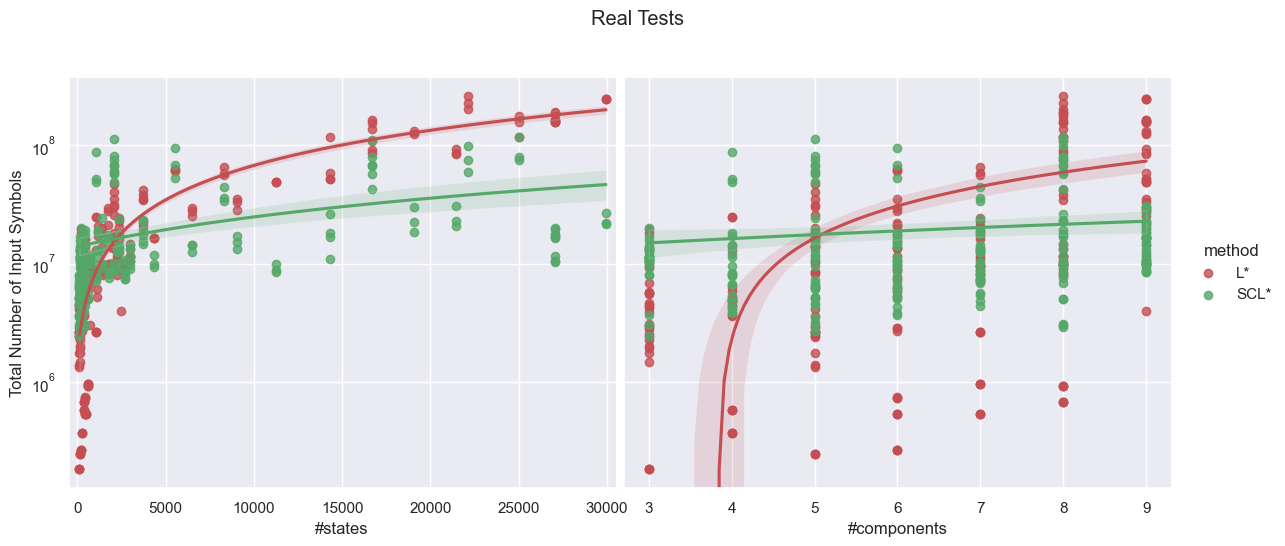

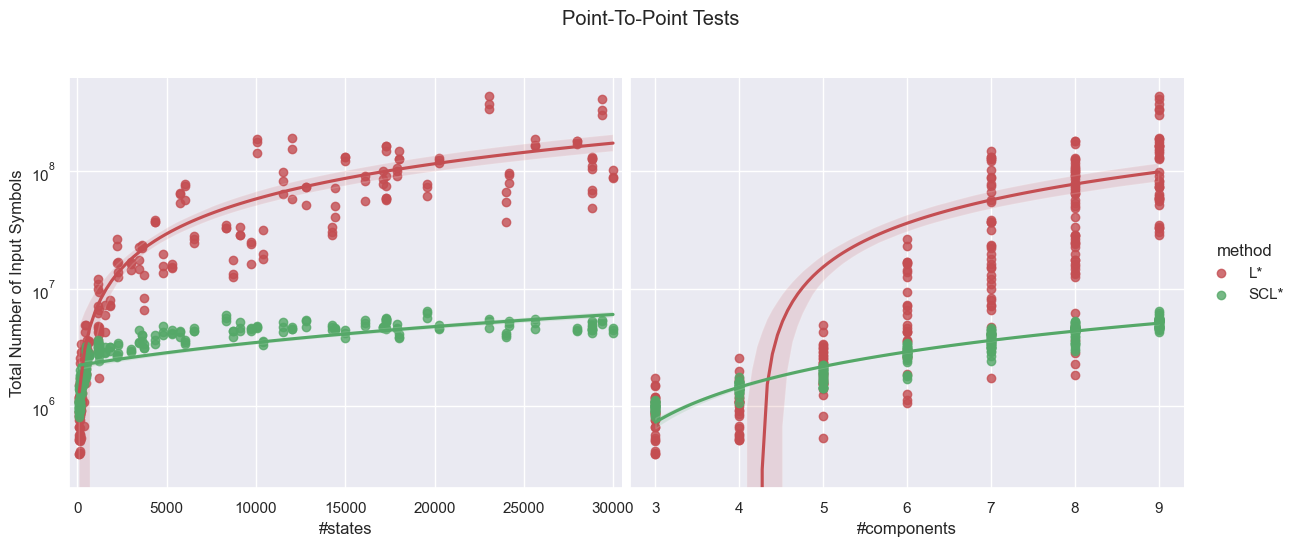

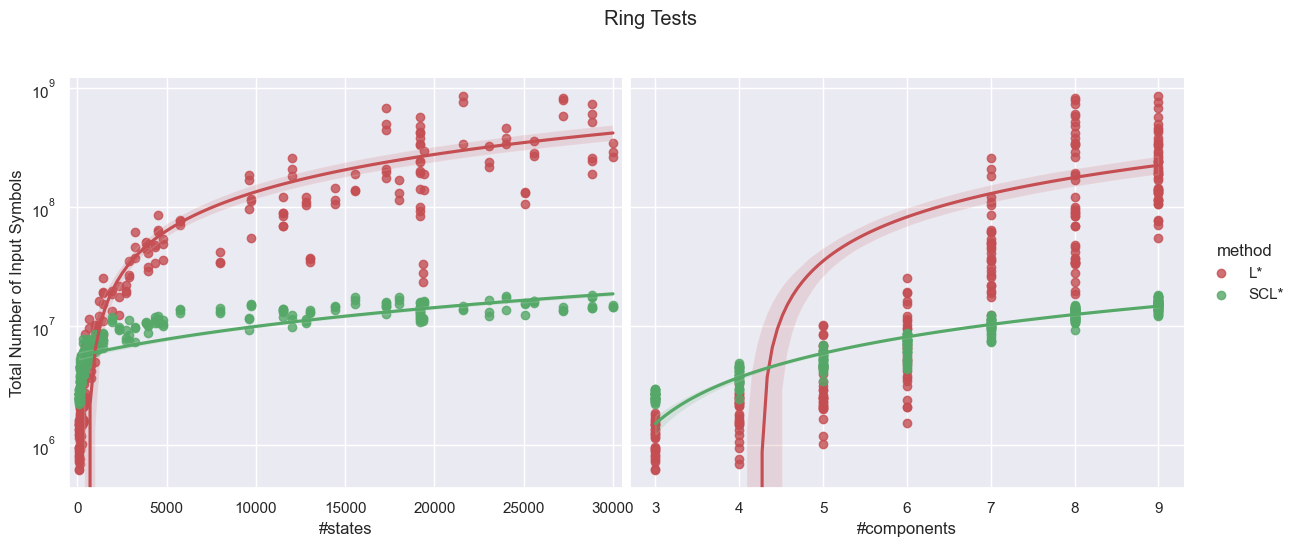

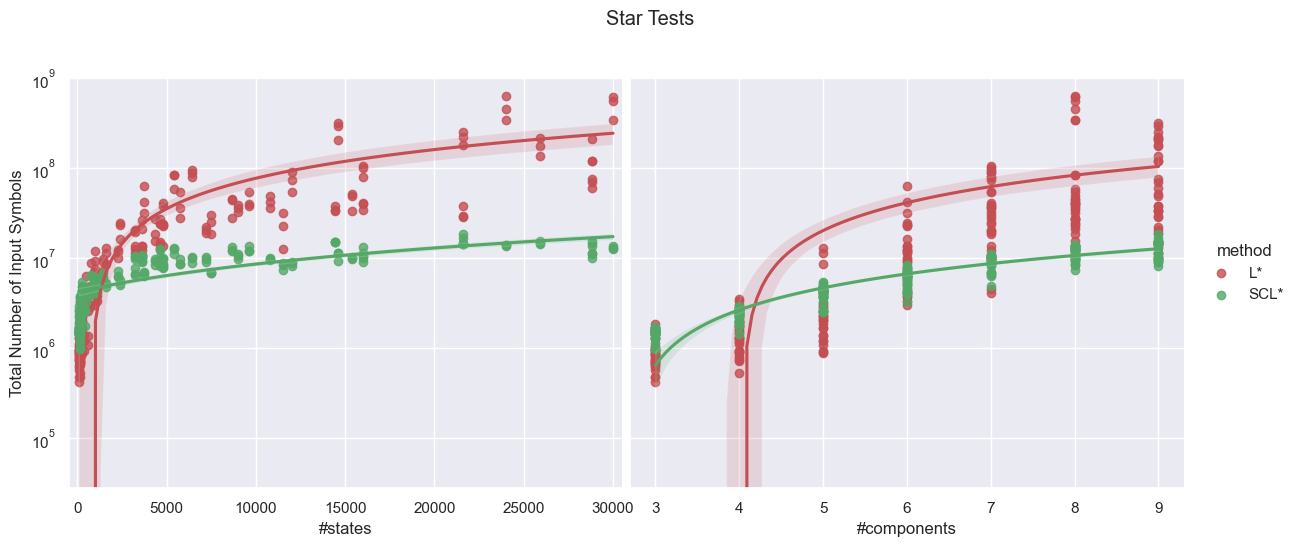

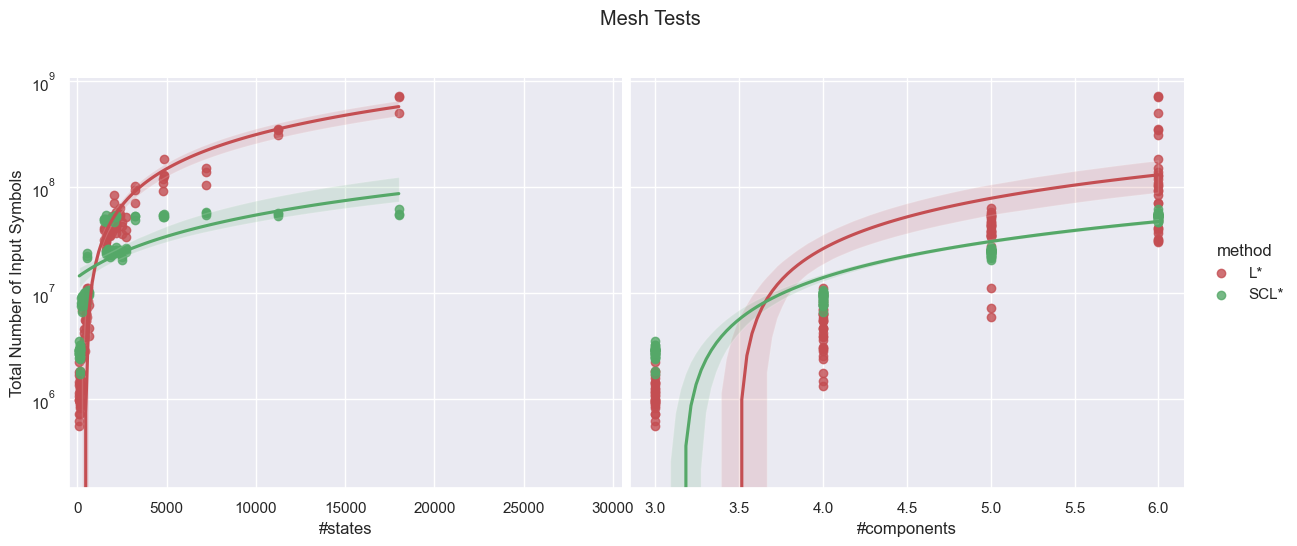

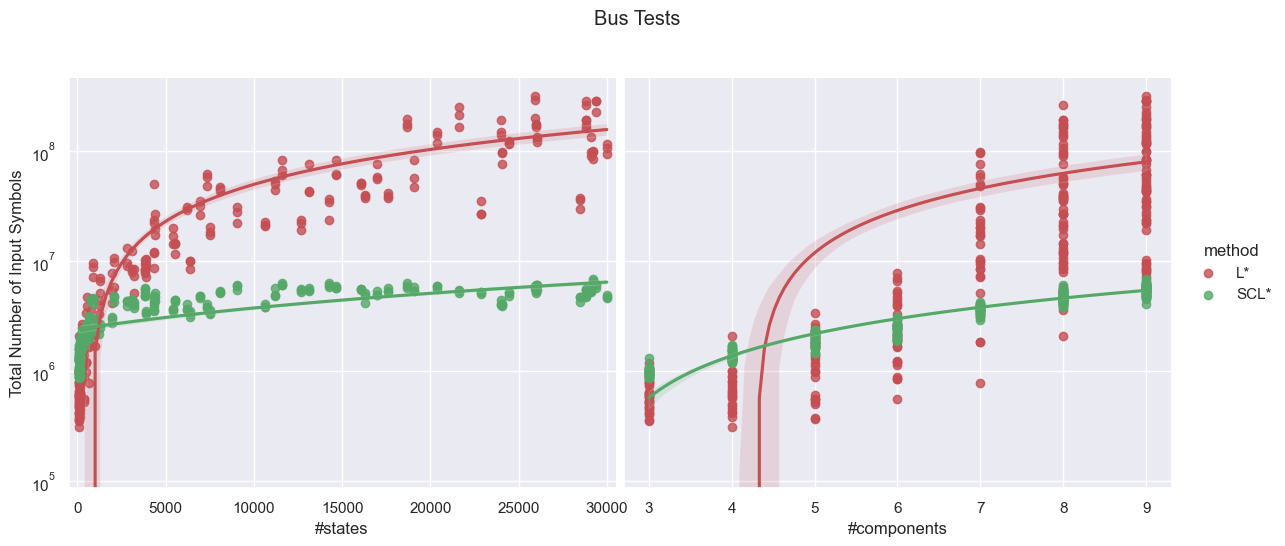

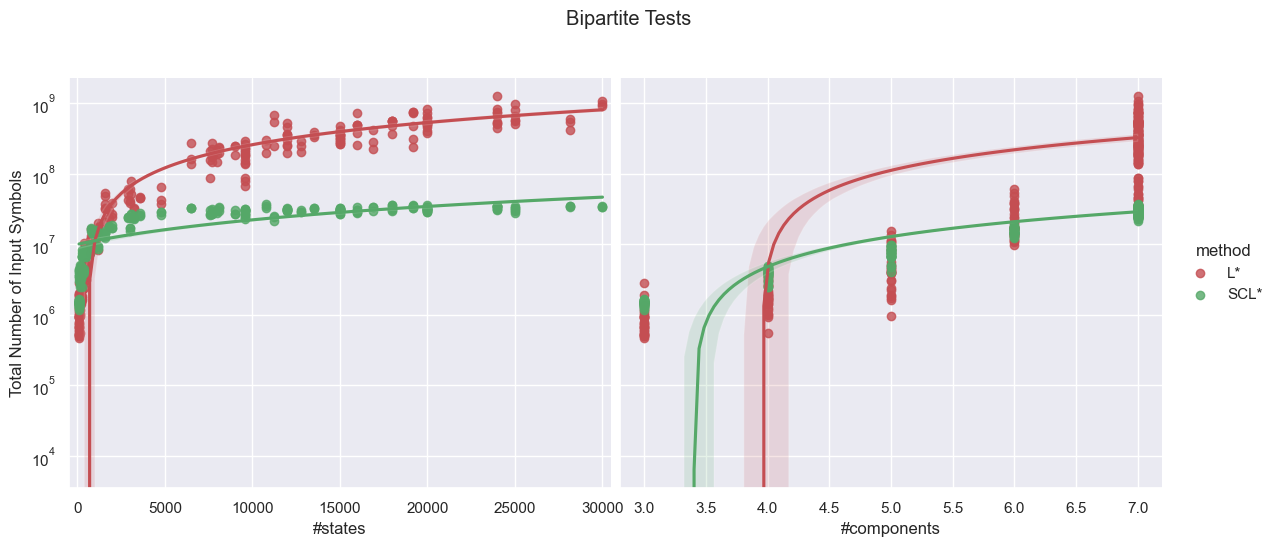

In [19]:
doForAllTests(plotSingleTypeData, False, "LSTAR_TOTAL_SYM", "CLSTAR_TOTAL_SYM", "Total Number of Input Symbols")

C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 


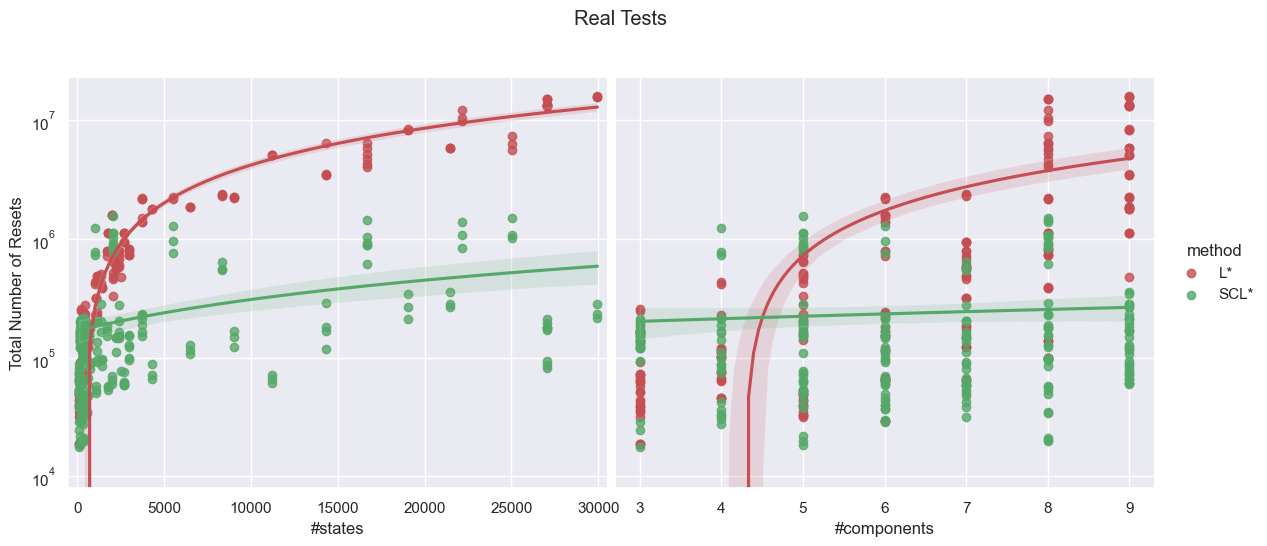

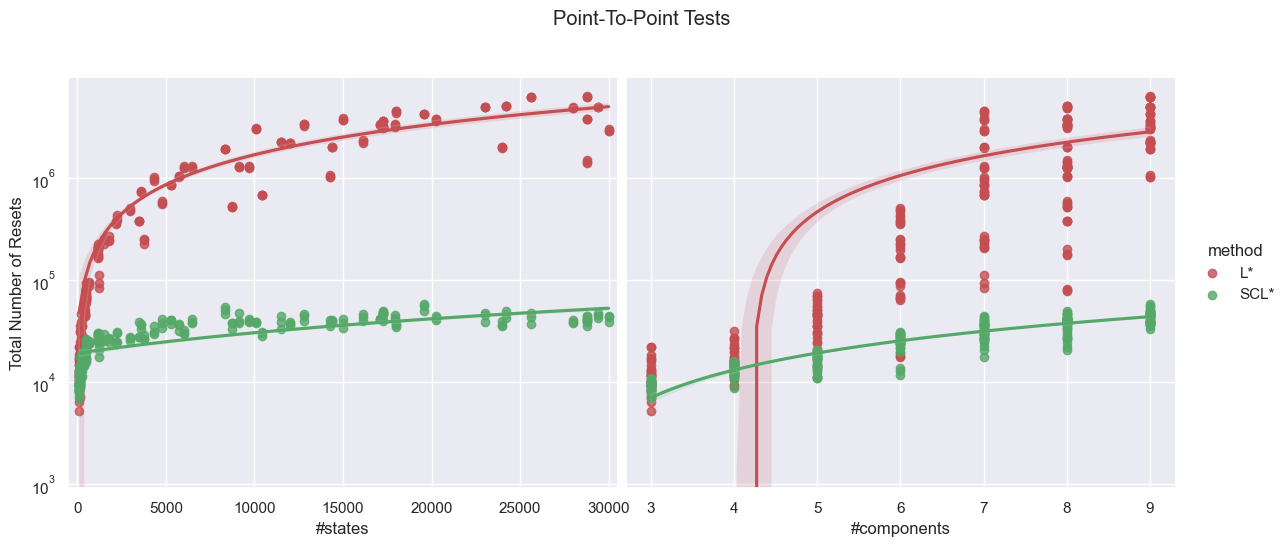

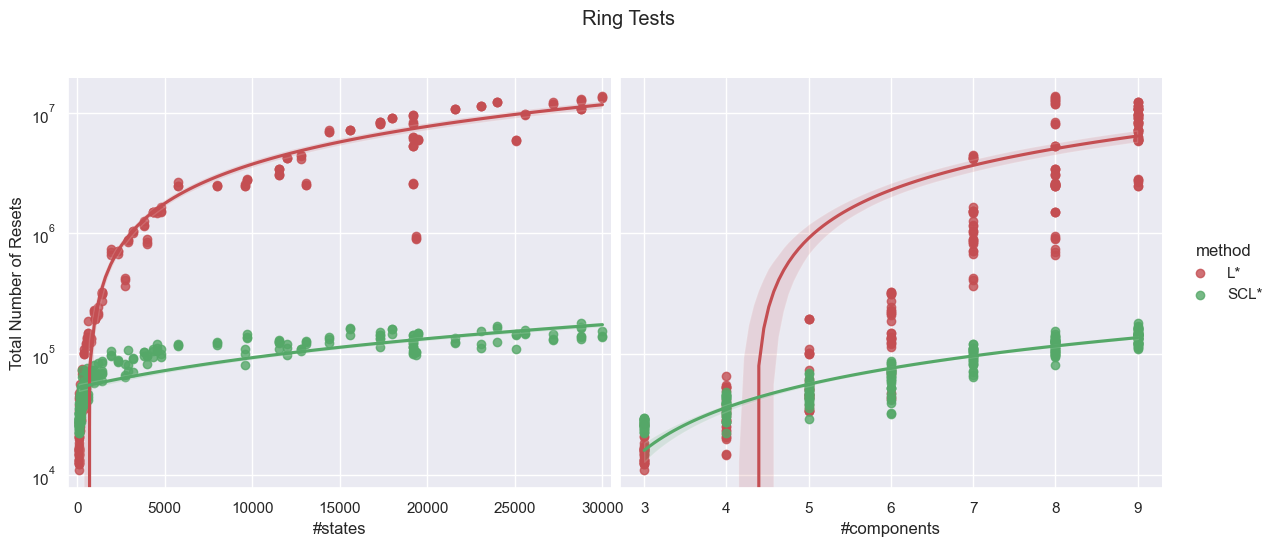

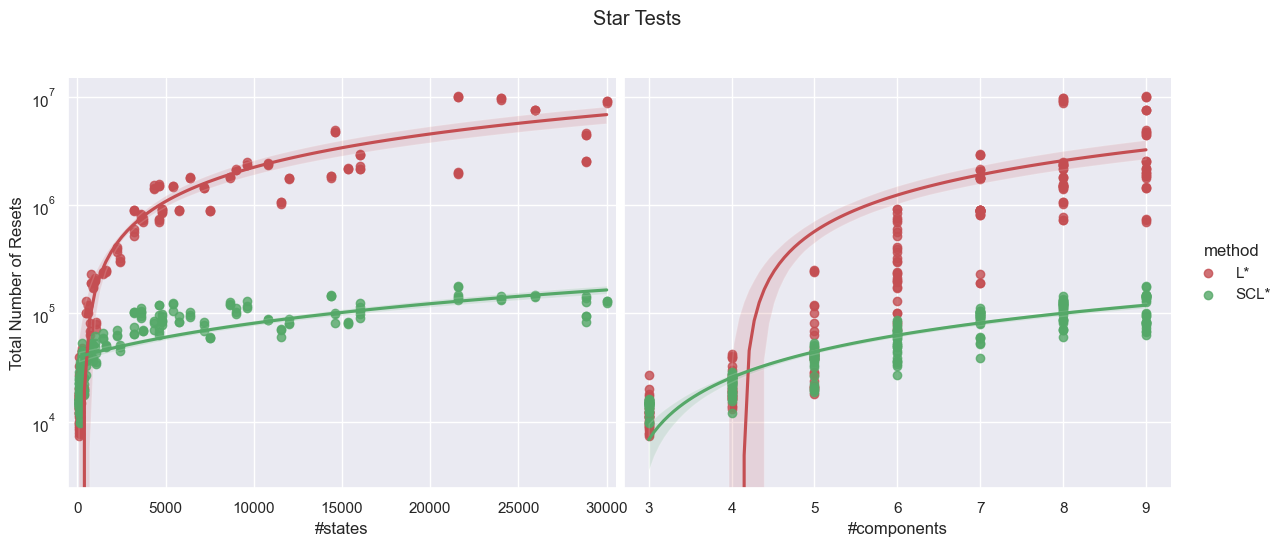

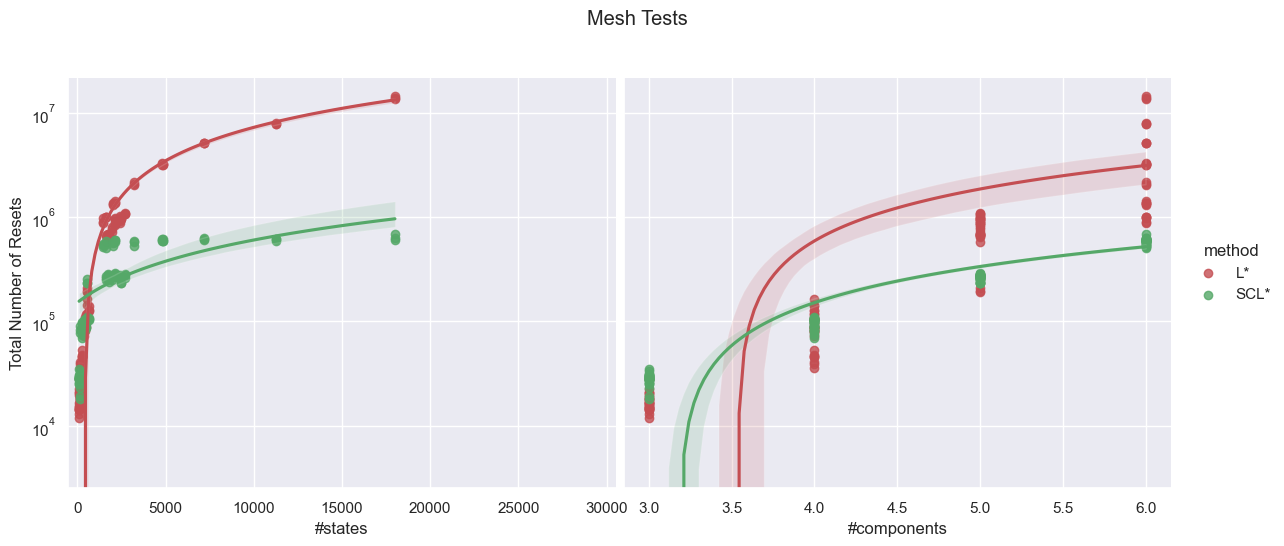

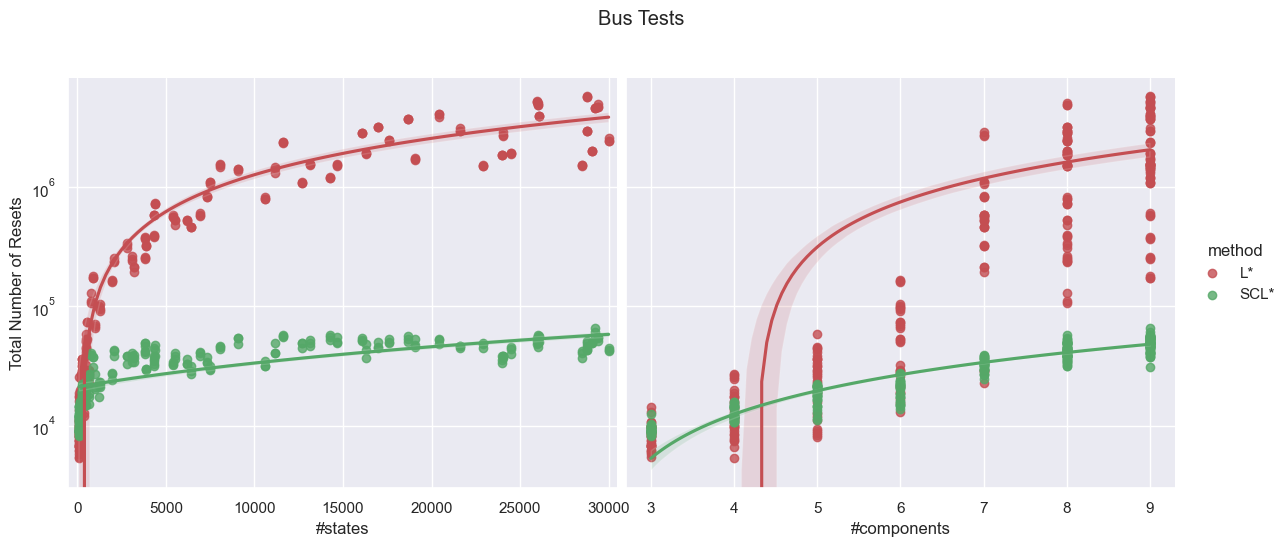

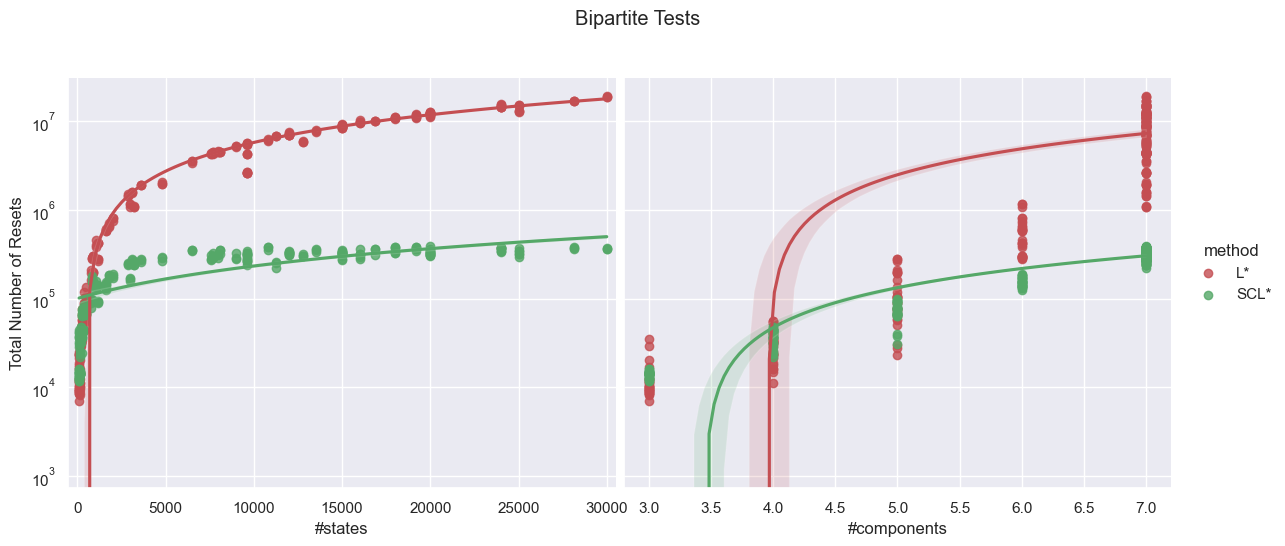

In [20]:
doForAllTests(plotSingleTypeData, False, "LSTAR_TOTAL_RST", "CLSTAR_TOTAL_RST", "Total Number of Resets")

C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 


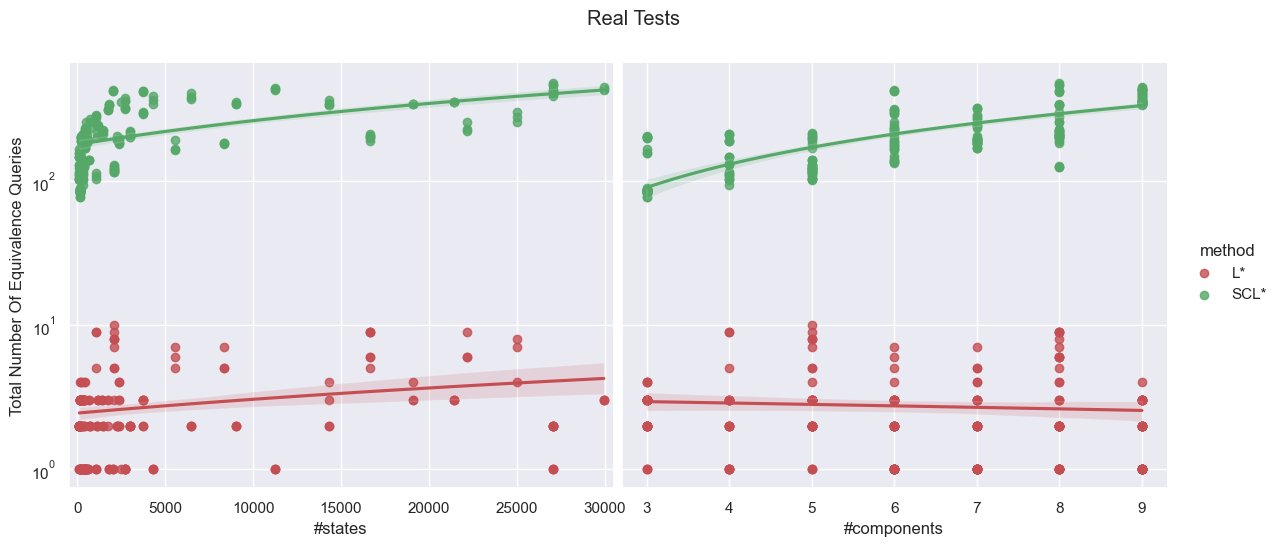

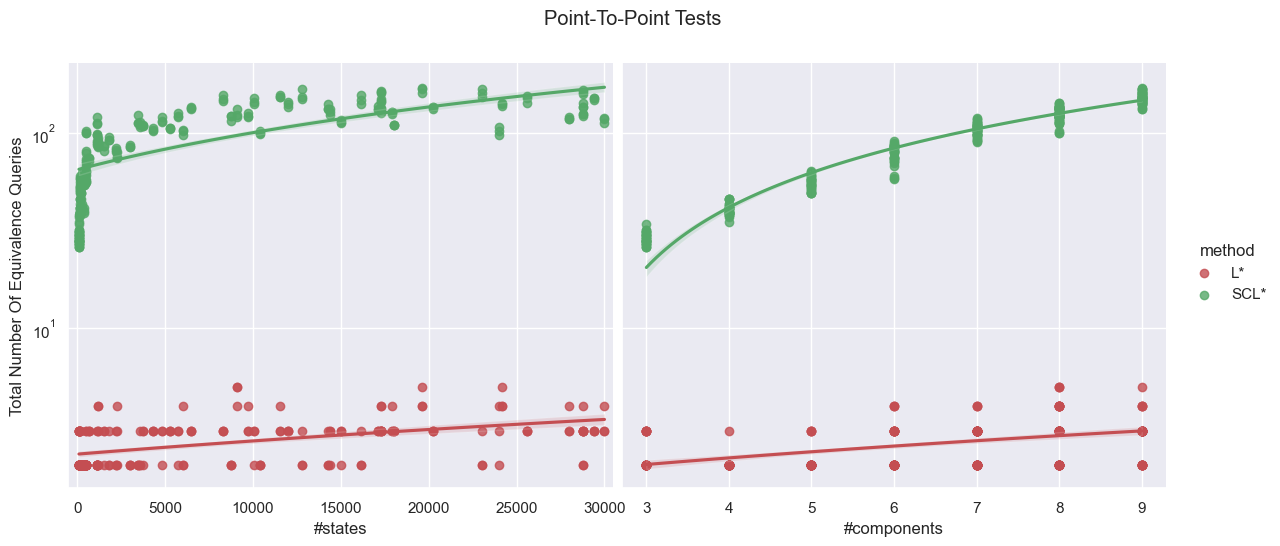

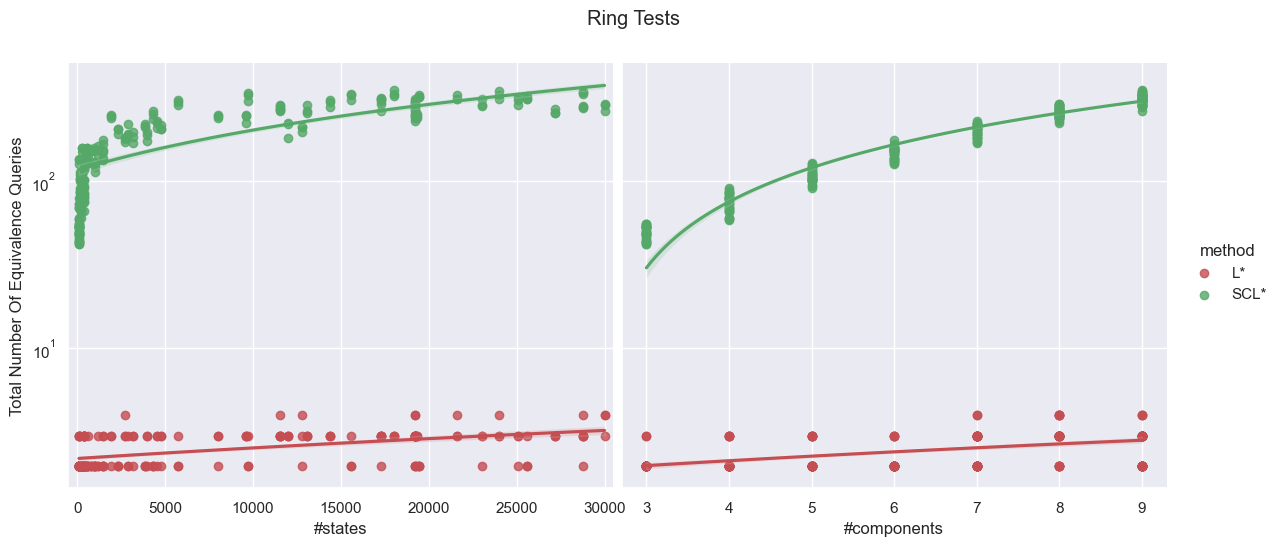

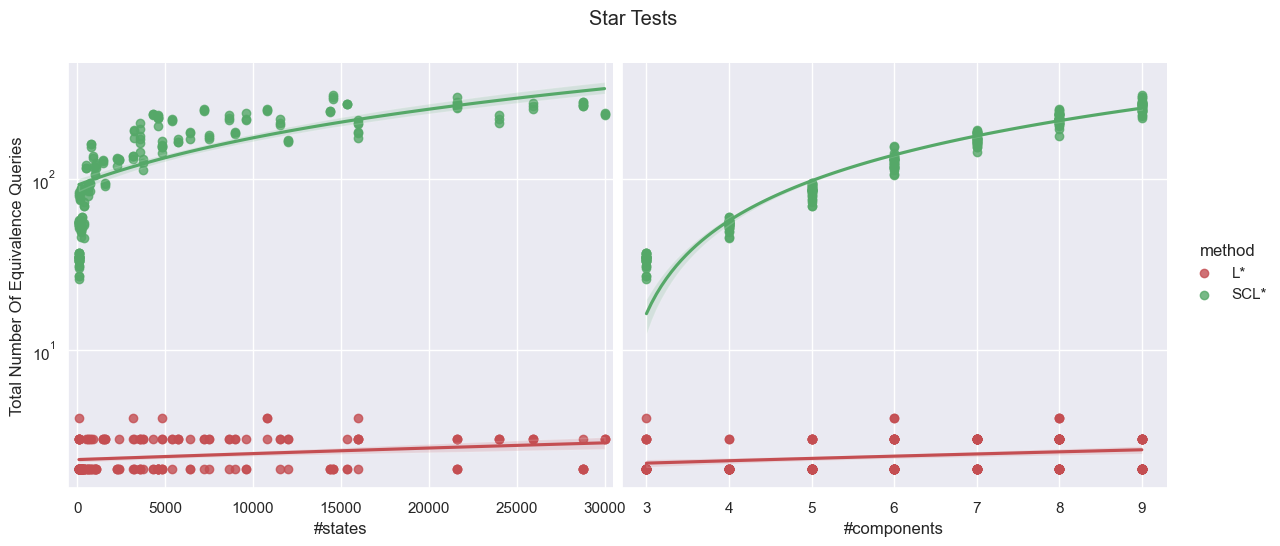

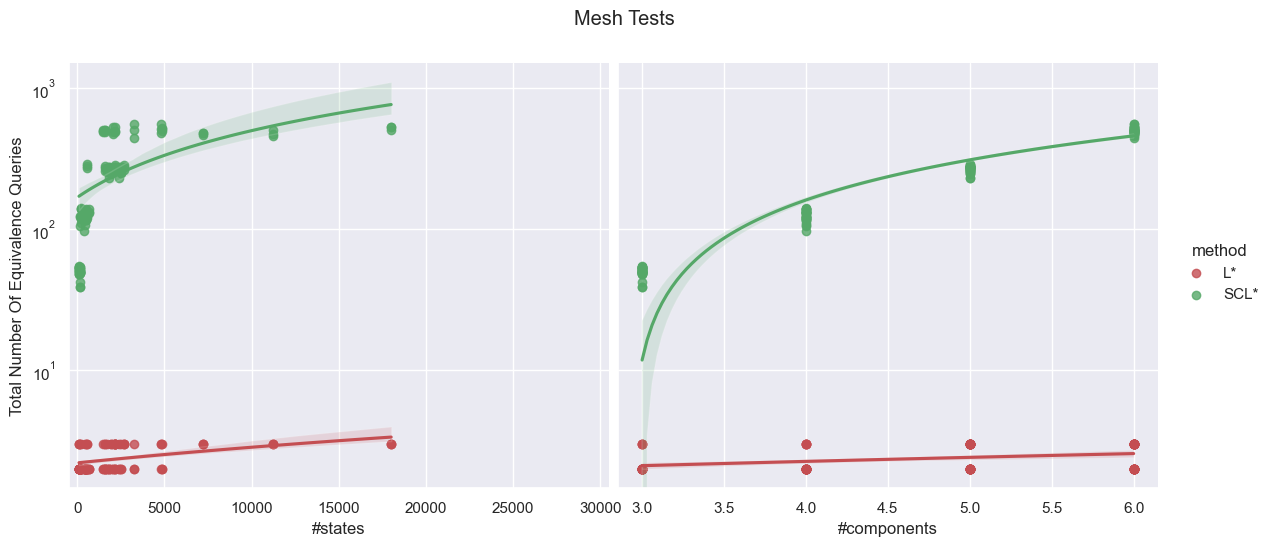

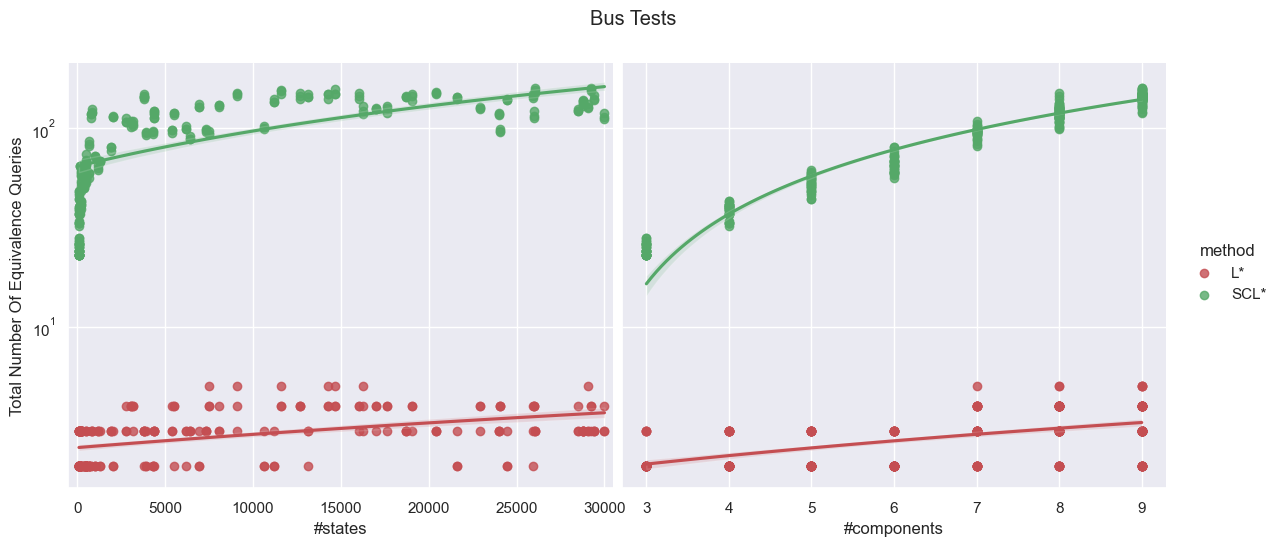

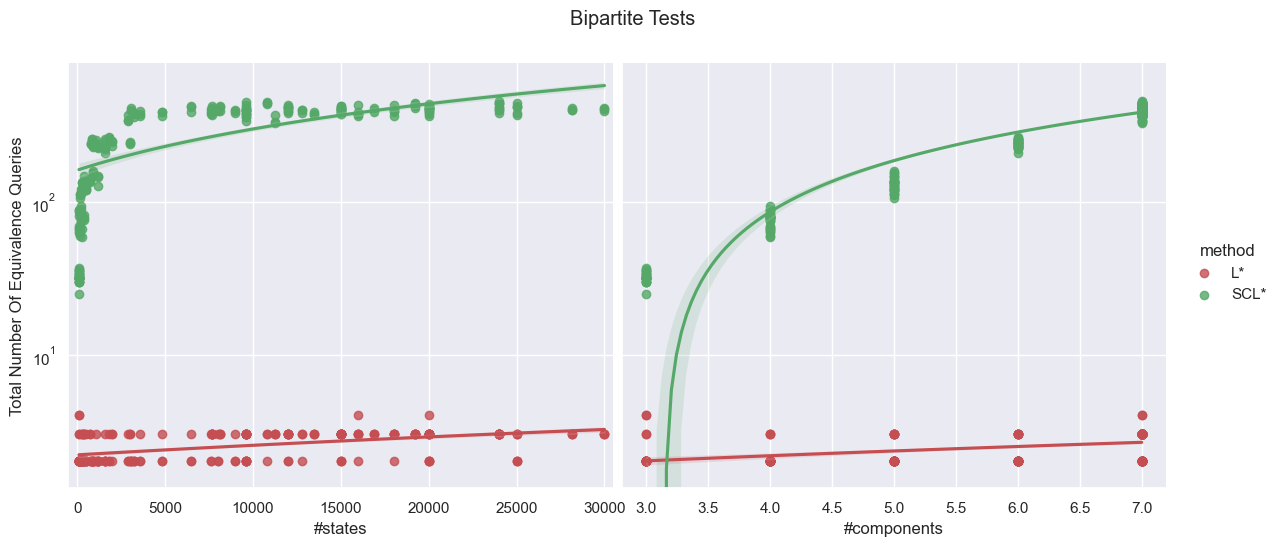

In [21]:
doForAllTests(plotSingleTypeData, False, "LSTAR_EQs", "CLSTAR_EQs", "Total Number Of Equivalence Queries")

C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*', 'SCL*', '#components', '#states']] = d2[[yCol1, yCol2, 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_10936\3908458157.py:4: SettingWithCopyWarning: 


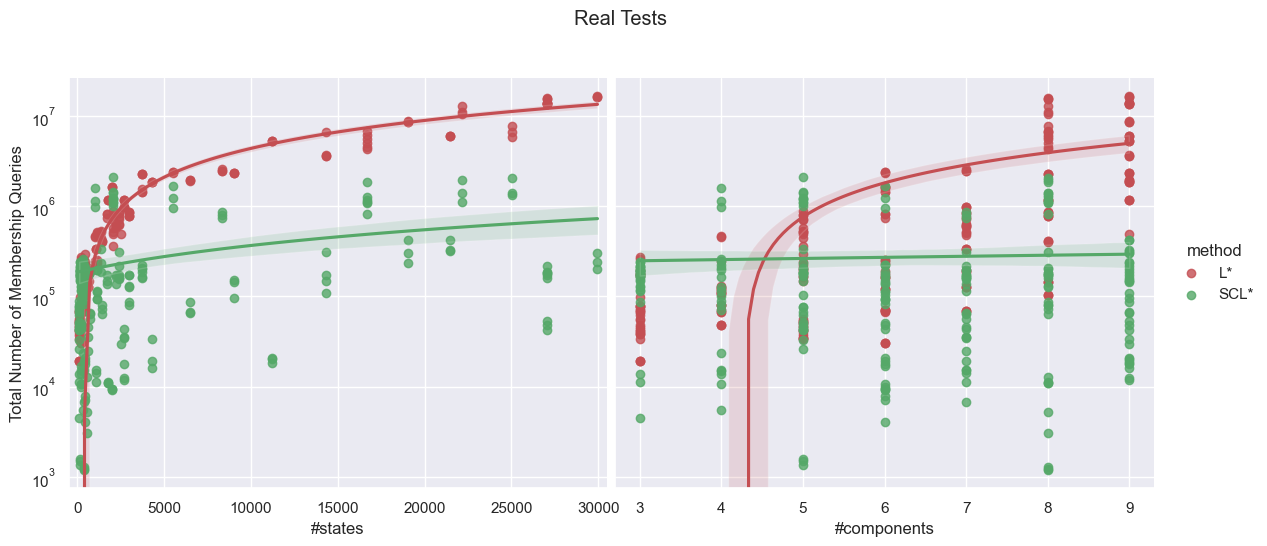

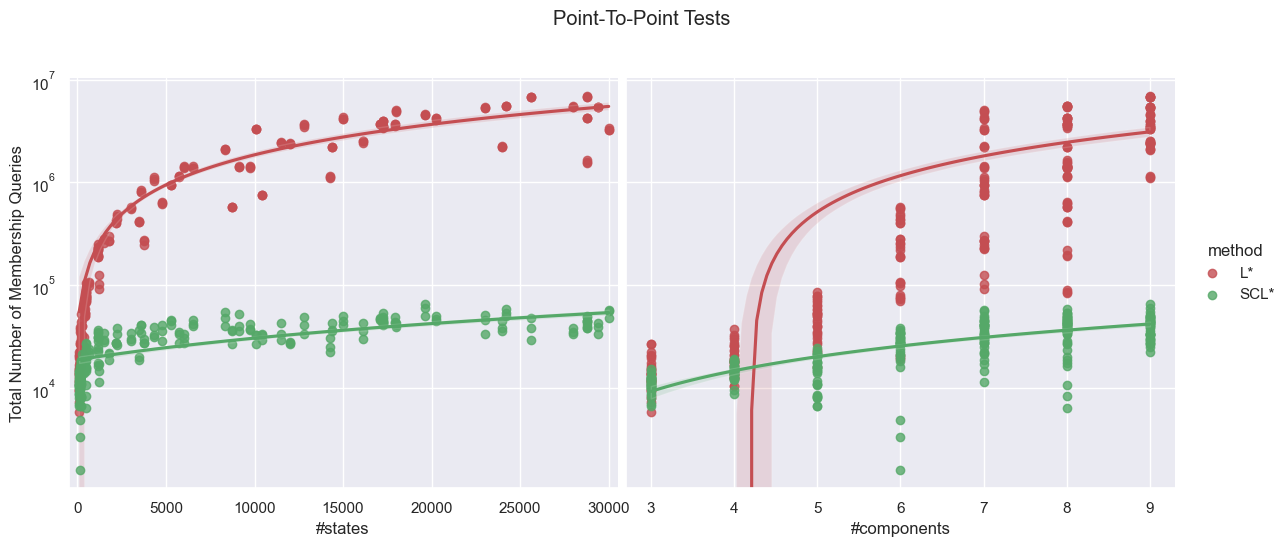

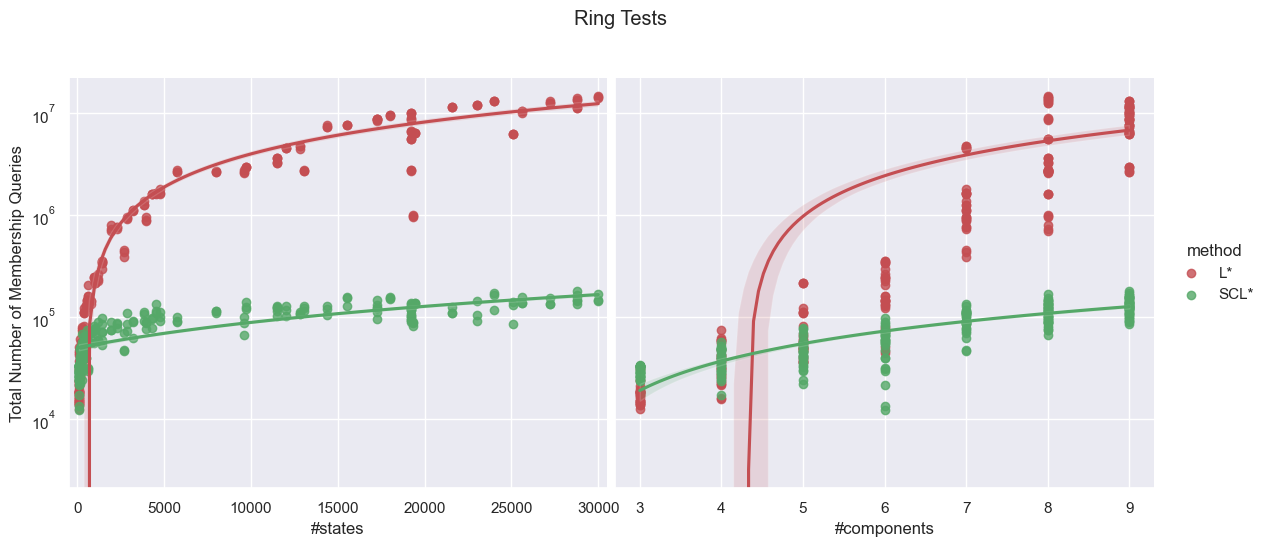

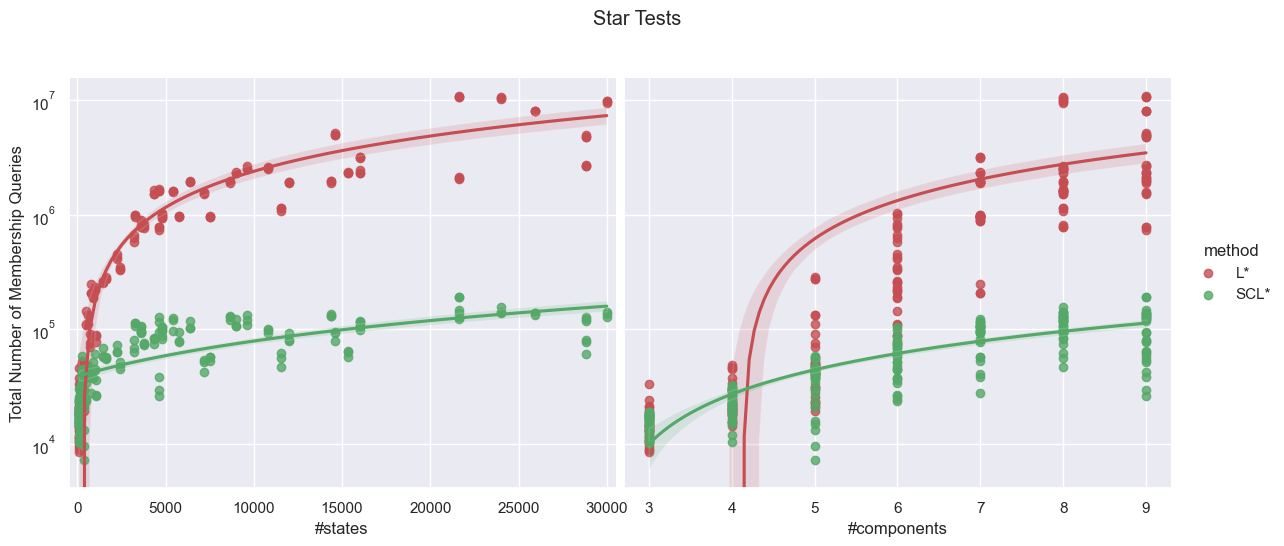

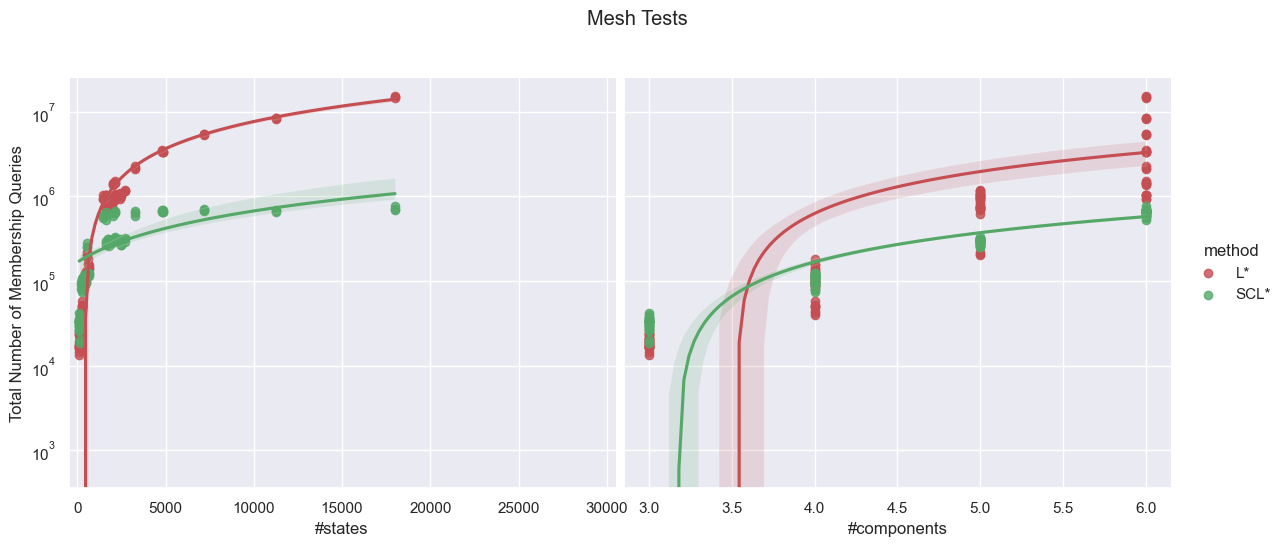

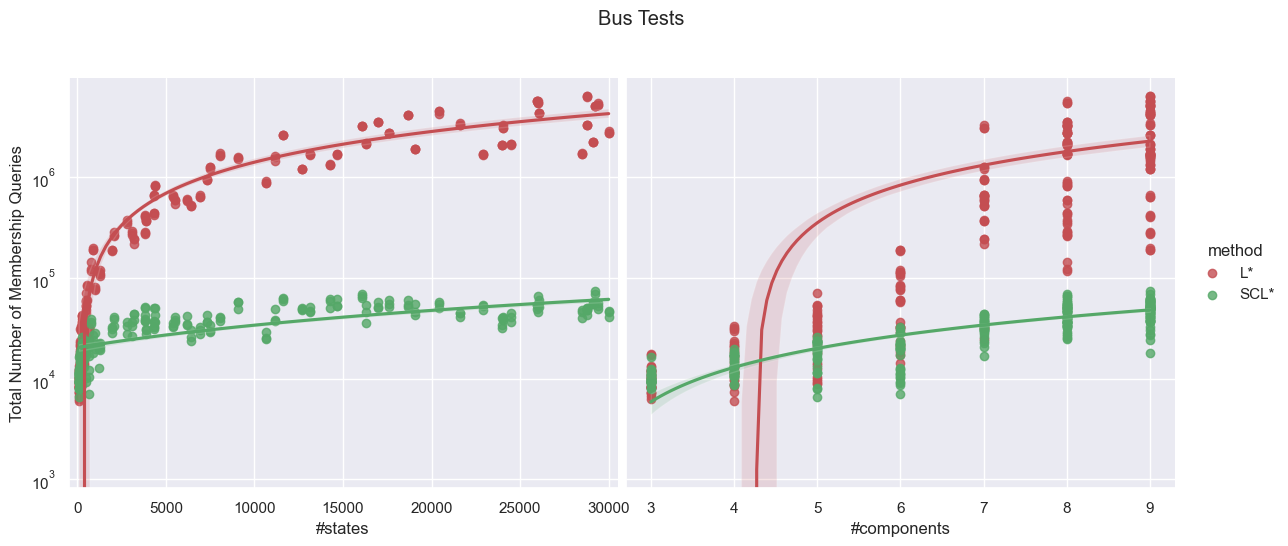

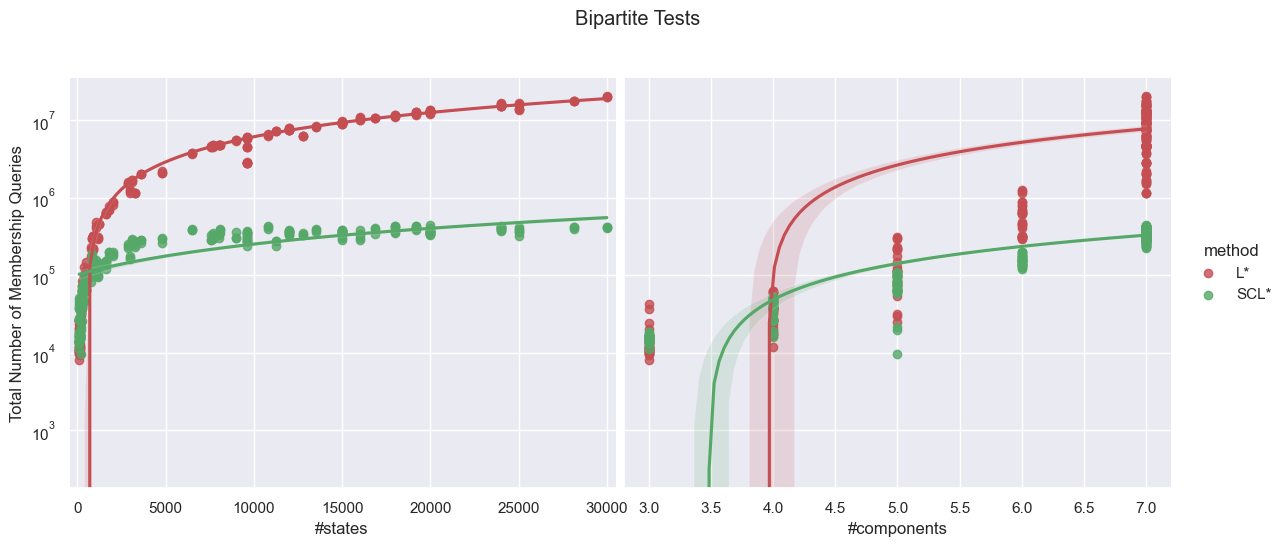

In [22]:
doForAllTests(plotSingleTypeData, False, "LSTAR_MQs", "CLSTAR_MQs", "Total Number of Membership Queries")

In [40]:
def plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, bipartiteTestsDf, yCol, yLabel):
    sns.set(style="whitegrid")  
    
    fig, axes = plt.subplots(ncols=2)
    
    markers = ["v", "o", "*", "d"]
    colors = ["g", "b", "Orange", "r"]
    labels = ["P2P", "Ring", "Star", "Bipartite"]
    
    testDfs = [p2pTestsDf, ringTestsDf, starTestsDf, bipartiteTestsDf]
    
    typeLegend = [plt.scatter([], [], marker=marker, color=color, label=label) for\
        marker, color, label in zip(markers, colors, labels)]
    methodLegend = [plt.Line2D([], [], color='Black', label='SCL*'),\
        plt.Line2D([], [], color='Black', label='L*', linestyle='--')]
    
    for ax, xCol, xLabel, xLim, yLim in zip(axes, ['STATES', 'CLSTAR_COMPONENTS'],\
        ['States', 'Components'], [[50, 30500], [2.9, 9.1]], [400000 if 'SYM' in yCol else 1000] * 2):
        for df, marker, color in zip(testDfs, markers, colors):
            sns.regplot(data=df, x=xCol, y=yCol, marker=marker, color=color,
                        ax=ax, line_kws={'linestyle': '--'})
            sns.regplot(data=df, x=xCol, y=yCol.replace('LSTAR', 'CLSTAR'), marker=marker, color=color,
                        ax=ax)

        ax.set_xlabel(xLabel)
        ax.set_xlim(xLim)
        ax.set_ylim(bottom=yLim)
        ax.set_yscale('log')
        ax.set_facecolor("#e4e6eb")
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='white')
        ax.xaxis.grid(color='white')
        
        type_legend = ax.legend(handles=typeLegend, loc='upper left')
        method_legend = ax.legend(handles=methodLegend, loc='upper right')
        ax.add_artist(type_legend)

    axes[0].set_ylabel(yLabel)
    axes[1].set_ylabel('')
  
    plt.tight_layout() 
    plt.savefig("Resets.pdf", format = "pdf")
    plt.show()


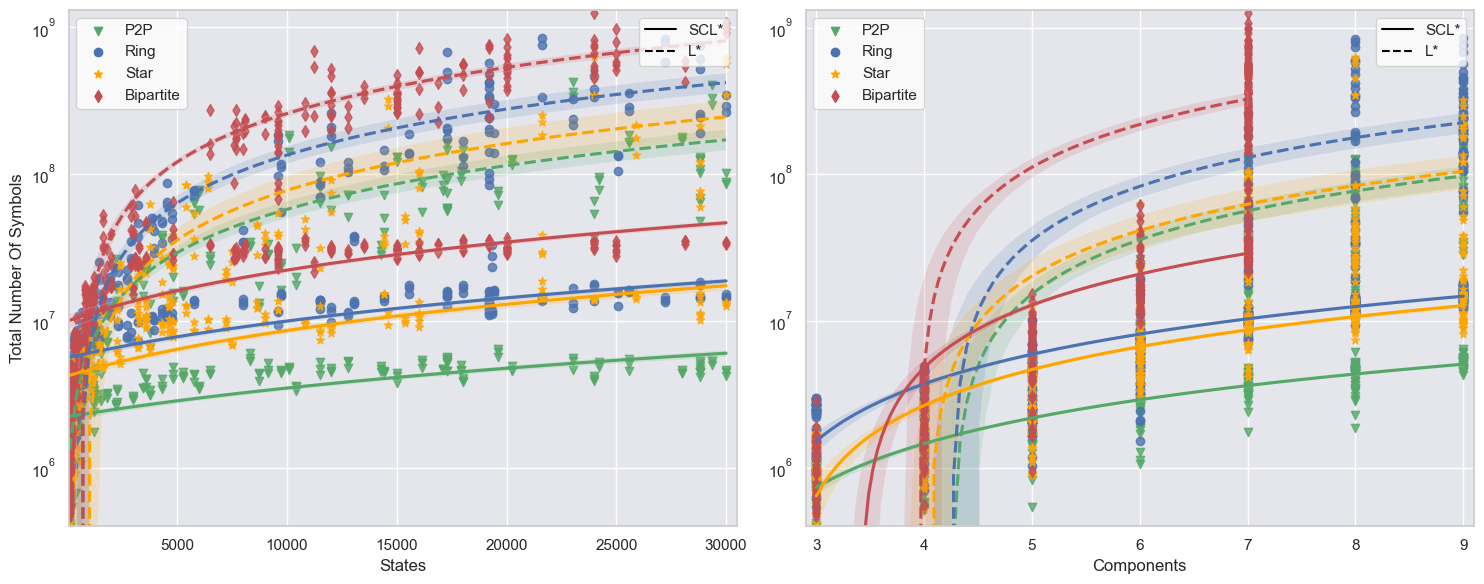

In [39]:
plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, bipartiteTestsDf, "LSTAR_TOTAL_SYM", "Total Number Of Symbols")

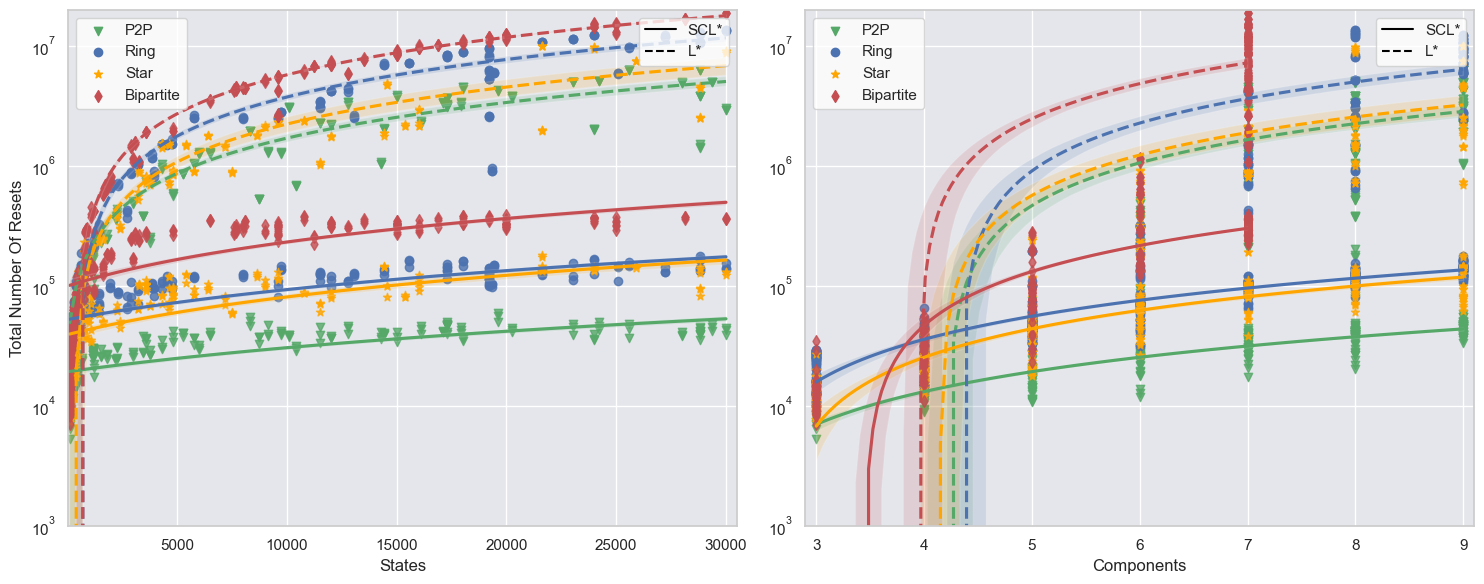

In [41]:
plotMergedData(p2pTestsDf, ringTestsDf, starTestsDf, bipartiteTestsDf, "LSTAR_TOTAL_RST", "Total Number Of Resets")